In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')
import cv2

In [2]:
df = pd.read_pickle('./data/tracks_5834a005e411dc743a5d52de.pkl')

In [19]:
df

timestamp     x    y  track_num
0   1.574211e+09    60  605          0
1   1.574211e+09   111  606          0
2   1.574211e+09   160  603          0
3   1.574211e+09   213  600          0
4   1.574211e+09   260  593          0
5   1.574211e+09   305  591          0
6   1.574211e+09   347  592          0
7   1.574211e+09   393  588          0
8   1.574211e+09   428  586          0
9   1.574211e+09   472  583          0
10  1.574211e+09   516  582          0
11  1.574211e+09   562  579          0
12  1.574211e+09   574  577          0
0   1.574294e+09   632  369          1
1   1.574294e+09   643  374          1
2   1.574294e+09   656  378          1
3   1.574294e+09   664  378          1
0   1.574291e+09   170  445          2
1   1.574291e+09   170  445          2
2   1.574291e+09   170  445          2
3   1.574291e+09   231  431          2
4   1.574291e+09   255  431          2
5   1.574291e+09   279  432          2
6   1.574291e+09   317  431          2
7   1.574291e+09   352  435          2
8   1.574291e+09   418  446          2
9   1.574291e+09   439  448          2
10  1.574291e+09   455  450          2
11  1.574291e+09   466  452          2
12  1.574291e+09   466  452          2
..           ...   ...  ...        ...
1   1.577911e+09   284  418      72057
2   1.577911e+09   366  415      72057
3   1.577911e+09   453  420      72057
4   1.577911e+09   543  420      72057
5   1.577911e+09   628  421      72057
6   1.577911e+09   715  423      72057
7   1.577911e+09   801  424      72057
0   1.577908e+09   820  367      72058
1   1.577908e+09   852  363      72058
2   1.577908e+09   888  364      72058
3   1.577908e+09   920  366      72058
4   1.577908e+09   959  369      72058
5   1.577908e+09   975  370      72058
6   1.577908e+09   994  370      72058
7   1.577908e+09  1019  376      72058
8   1.577908e+09  1038  377      72058
9   1.577908e+09  1057  381      72058
10  1.577908e+09  1075  384      72058
11  1.577908e+09  1099  387      72058
12  1.577908e+09  1124  390      72058
13  1.577908e+09  1148  394      72058
14  1.577908e+09  1170  396      72058
15  1.577908e+09  1175  397      72058
16  1.577908e+09  1178  397      72058
17  1.577908e+09  1181  398      72058
18  1.577908e+09  1183  398      72058
19  1.577908e+09  1186  398      72058
20  1.577908e+09  1189  400      72058
21  1.577908e+09  1192  401      72058
22  1.577908e+09  1193  401      72058

[1307209 rows x 4 columns]

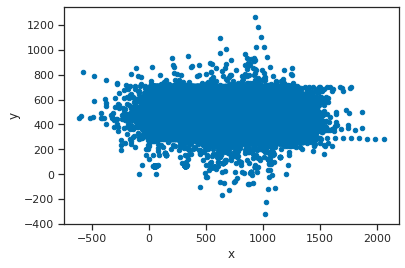

In [10]:
df.plot.scatter('x', 'y')

In [69]:
pointim = cv2.imread("./data/thepoint.png")
pointim = cv2.resize(pointim, (1280, 720))

In [70]:
def plot_track(img, track_dat):
    """
    Plot a track to an image and return the image with plotted track
    
    param img: opencv image
    param track_dat: track data frame
    return img
    """
    
    last_point = None
    for index, row in track_dat.iterrows():
        cv2.circle(img, (int(row['x']), int(row['y'])), 3, (255, 0, 0), thickness=4)
        if last_point:
            cv2.line(img, last_point, (int(row['x']), int(row['y'])), (0, 255, 0), thickness=2)
        last_point = (int(row['x']), int(row['y']))
        
    return img

In [71]:
for i in range(0, 10):
    pointim = plot_track(pointim, df[df['track_num'] == i])

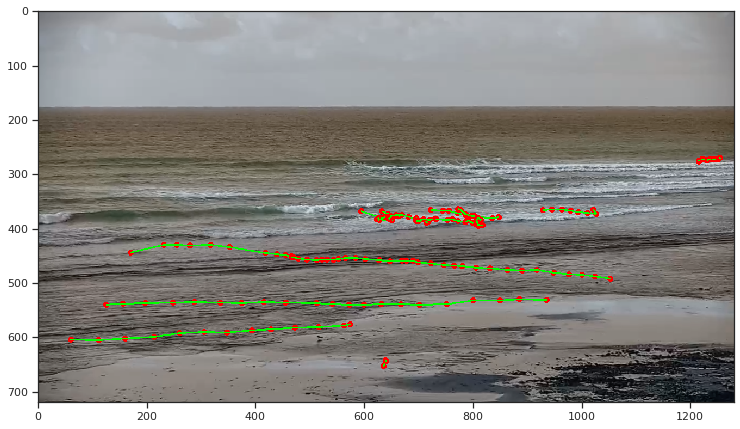

In [72]:
plt.figure(figsize=(12.8, 7.2))
plt.imshow(pointim)